# Spatial Inequality Analysis


## Introduction

At the time this is being written, the topic of inequality is at the top of
agenda of policy makers and is drawing considerable attention in academic
circles. This is due to historic levels of inequality across the globe
(references). Much of the focus has been on *interpersonal income inequality*,
yet there is a growing recognition that the question of *interregional income
inequality* requires further attention as the growing gaps between poor and rich
regions have been identified as key drivers of political polarization in
developing and developed countries (CITE ANDRES).

Indeed, while the two literatures, personal and regional inequality, are
related, they have developed in a largely parallel fashion with limited
cross-fertilization. In this notebook, we examine how a spatially explicit focus
can provide insights on inequality and its dynamics. We also show the lineage of
regional inequality analysis to make explicit the linkage between it and the
older literature on personal inequality analysis.

We begin with an introduction to classic methods for interpersonal income
inequality analysis and how they have been adopted to the question of regional
inequalities. These include a number of graphical tools along side familiar
indices of inequality. As we discuss more fully, the use of these classical
methods in spatially referenced data, while useful in providing insights on some
of the aspects of spatial inequality, fails to fully capture the nature of
geographical disparities and their dynamics. Thus, we next move to spatially
explicit measures for regional inequality analysis. The notebook closes with
some recent extensions of some classical measures to more fully examine the
spatial dimensions of regional inequality dynamics.


## Data: US State Per-Capita Income 1969-2017


We focus on the case of the United States over the
period  1969-2017.


---

In [1]:
%matplotlib inline

import seaborn
import pandas
import geopandas
import pysal
import numpy
import mapclassify
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

In [2]:

gdf = geopandas.read_file('../data/us_county_income/usincome_final.shp')
gdf.head()


,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,LineCode,METDIVFP,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,geometry
0,3897,3968,4183,4444,4902,5093,5511,5955,6711,7478,...,3,None,G4020,Sauk,Sauk County,3,55,CAINC1,Dollars,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
1,3498,3732,3841,4097,4624,4987,5299,5836,6529,7267,...,3,None,G4020,Pierce,Pierce County,3,55,CAINC1,Dollars,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
2,3335,3604,3870,4218,4670,5108,5509,6318,6873,7443,...,3,None,G4020,La Crosse,La Crosse County,3,55,CAINC1,Dollars,"POLYGON ((-91.347741 43.911964, -91.348743 43...."
3,2740,2953,3275,3482,4014,4335,4733,5169,5885,6323,...,3,None,G4020,Dunn,Dunn County,3,55,CAINC1,Dollars,"POLYGON ((-92.135379 44.944807, -92.135378 44...."
4,2711,2936,3289,3720,4214,4588,4923,5512,6067,6383,...,3,None,G4020,Jackson,Jackson County,3,55,CAINC1,Dollars,"POLYGON ((-91.166006 44.335102, -91.166004 44...."


Inspection of the head of the data frame reveals that the years appear as columns in the data set, together with information about the particular record.
This format is an example of a [*wide* longitudinal data set](https://www.theanalysisfactor.com/wide-and-long-data/).


In [3]:
gdf[['LineCode', 'Descriptio']].head()


,LineCode,Descriptio
0,3,Per capita personal income (dollars) 2/
1,3,Per capita personal income (dollars) 2/
2,3,Per capita personal income (dollars) 2/
3,3,Per capita personal income (dollars) 2/
4,3,Per capita personal income (dollars) 2/


In [4]:
pci_df = gdf[gdf.LineCode == 3]

In [5]:
pci_df.head()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,LineCode,METDIVFP,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,geometry
0,3897,3968,4183,4444,4902,5093,5511,5955,6711,7478,...,3,None,G4020,Sauk,Sauk County,3,55,CAINC1,Dollars,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
1,3498,3732,3841,4097,4624,4987,5299,5836,6529,7267,...,3,None,G4020,Pierce,Pierce County,3,55,CAINC1,Dollars,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
2,3335,3604,3870,4218,4670,5108,5509,6318,6873,7443,...,3,None,G4020,La Crosse,La Crosse County,3,55,CAINC1,Dollars,"POLYGON ((-91.347741 43.911964, -91.348743 43...."
3,2740,2953,3275,3482,4014,4335,4733,5169,5885,6323,...,3,None,G4020,Dunn,Dunn County,3,55,CAINC1,Dollars,"POLYGON ((-92.135379 44.944807, -92.135378 44...."
4,2711,2936,3289,3720,4214,4588,4923,5512,6067,6383,...,3,None,G4020,Jackson,Jackson County,3,55,CAINC1,Dollars,"POLYGON ((-91.166006 44.335102, -91.166004 44...."


In [7]:
pci_df.shape

(3077, 76)

In [8]:
pci_df[['1969', 'STATEFP', 'COUNTYFP', 'geometry']].head()

,1969,STATEFP,COUNTYFP,geometry
0,3897,55,111,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
1,3498,55,093,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
2,3335,55,063,"POLYGON ((-91.347741 43.911964, -91.348743 43...."
3,2740,55,033,"POLYGON ((-92.135379 44.944807, -92.135378 44...."
4,2711,55,053,"POLYGON ((-91.166006 44.335102, -91.166004 44...."


## Global Inequality
We begin our examination of inequality by focusing on several global measures. Here, global means the measure is concerned with the overall, or a-spatial, nature of inequality. Several classic measures of inequality are available for this purpose.

In general terms, measures of inequality focus on the dispersion present in an income distribution. In the case of regional, or spatial, inequality the distributions are defined on average or per-capita incomes for a spatial unit, such as a county, census tract, or region. For the US counties, we can visualize the distribution of per capita incomes for the first year in the sample as follows:


To get a sense for the value distribution for per capita income, we can first discretize the distribution:

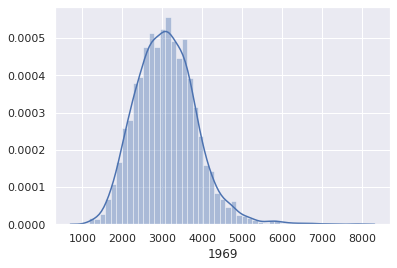

In [9]:
import seaborn  as sns
sns.set()
sns.distplot(pci_df['1969'])


The long right tail is a prominent feature of the distribution, and is common in the study of incomes. A key point to keep in mind here is that the unit of measurement in this data is a spatial aggregate - a county. By contrast, in the wider inequality literature the observational unit is typically a household or individual. In the latter distributions, the degree of skewness is often more pronounced. (Say something about averaging effect for regional distributions).

The density is a powerful summary device that captures the overall morphology of the *value* distribution. At the same time, the density is silent on the underlying *spatial distribution* of county incomes. We can look at this second view of the distribution using a choropleth map:

In [10]:
from pysal.viz import mapclassify
pci_1969 = pci_df['1969']

In [11]:
q5_1969 = mapclassify.Quantiles(pci_df['1969'])


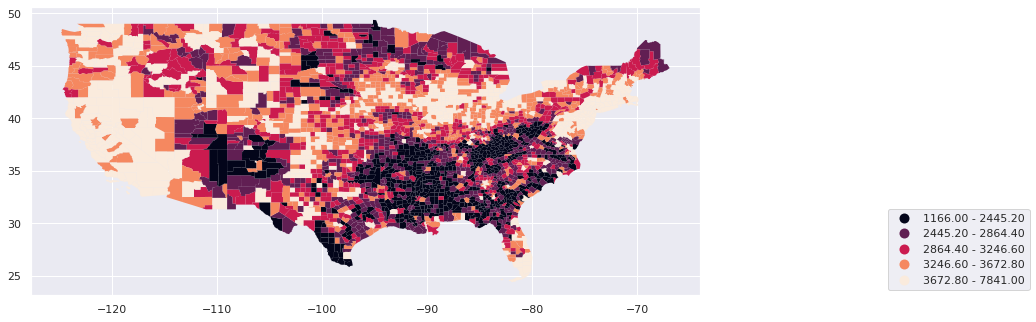

In [12]:
_= pci_df.plot(column='1969', scheme='Quantiles', legend=True,
                 edgecolor='none',
             legend_kwds={'loc': 'lower right',
                         'bbox_to_anchor':(1.5, 0.0)}, figsize=(12, 12))

SAY SOMETHING ABOUT CLUSTERING AND PATTERN
The choropleth and the kernel density provide different visual depictions of the distribution of county incomes. These are useful for developing an understanding of the overall  To gain more specific insights on the level of inequality in the distribution, we turn to a number of inequality indices.

### 20:20 Ratio

One commonly used measure of inequality in a distribution is the so called 20:20 ratio, which is defined as the ratio of the incomes at the 80th percentile over that at the 20th percentile: 
<!-- #endregion -->

In [13]:
q5_1969.bins

array([2445.2, 2864.4, 3246.6, 3672.8, 7841. ])

In [14]:
i_20_20 = q5_1969.bins[-2]/q5_1969.bins[0]
i_20_20

1.5020448225094063

In 1969 the richest 20% of the counties had an income that was 1.5 times the poorest 20% of the counties. The 20:20 ratio has the advantage of being robust to outliers at the top and the bottom of the distribution. 

We can examine the dynamics of this global inequality measure by creating a simple function to apply to all years in our time series:

In [15]:
def ineq_2020(values):
    q5 = mapclassify.Quantiles(values)
    return q5.bins[-2]/q5.bins[0]
    
    

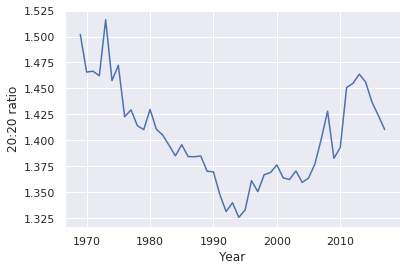

In [16]:
years = list(range(1969, 2018))
i_20_20_all = numpy.array([ ineq_2020(pci_df[str(year)]) for year in years])
_ = plt.plot(years, i_20_20_all)
_ = plt.ylabel("20:20 ratio")
_ = plt.xlabel("Year")



The ratio has a U-shaped pattern over time, bottoming out around 1994 after a long secular decline in the early period. Post 1994, however, the trend is one of increasing inequality up until 2013 where there is a turn towards lower income inequality between the counties.


For other classic measures of inequality, we will use the `inequality` package from `pysal`:

In [17]:
from pysal.explore import inequality

### Gini Index

The Gini index can be derived in a number of ways. Visually, the Gini is defined as the ratio of the area between
the line of equality and the Lorenze curve, both of which are defined on a a two-dimensional space with population
percentiles on the x-axis and cumulative income on the vertical axis.

We can construct each of these as follows:


In [18]:
y = pci_df.sort_values(by=['1969'])['1969']

In [19]:
Fy = (y / y.sum()).cumsum()

In [20]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
n = y.shape[0]
Fn = np.arange(1, n+1)/n

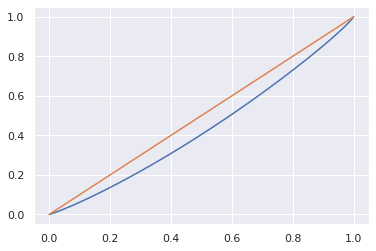

In [22]:
f, ax = plt.subplots()
ax.plot(Fn,Fy)
ax.plot(Fn, Fn)
#plt.xlim(0, 1.0)

The blue line is the Lorenze curve, and the Gini is the area between it and the 45-degree line of equality, expressed as a ratio over the area under the line of equality.

To examine how inequality evolves over time, we can create a function for the Lorenze curve:

In [23]:
def lorenz(y):
    y = np.sort(y)
    Fy = (y / y.sum()).cumsum()
    n = y.shape[0]
    Fn = np.arange(1, n+1)/n
    return Fy

In [24]:
lorenz(y)

array([1.22447634e-04, 2.52876417e-04, 3.83515230e-04, ...,
       9.98429814e-01, 9.99176576e-01, 1.00000000e+00])

and then call this for each year in our sample:

In [25]:
lorenz_curves = np.array([ lorenz(pci_df[str(year)]) for year in years])

In [26]:
lorenz_curves

array([[1.22447634e-04, 2.52876417e-04, 3.83515230e-04, ...,
        9.98429814e-01, 9.99176576e-01, 1.00000000e+00],
       [1.34666135e-04, 2.74890539e-04, 4.17260239e-04, ...,
        9.98425742e-01, 9.99170258e-01, 1.00000000e+00],
       [1.35618488e-04, 2.73501814e-04, 4.16005410e-04, ...,
        9.98412258e-01, 9.99173062e-01, 1.00000000e+00],
       ...,
       [1.05611874e-04, 2.53894487e-04, 4.06125878e-04, ...,
        9.97122641e-01, 9.98365341e-01, 1.00000000e+00],
       [1.41986673e-04, 2.90860641e-04, 4.48503155e-04, ...,
        9.96903731e-01, 9.98211488e-01, 1.00000000e+00],
       [9.27373942e-05, 2.42055708e-04, 3.93106488e-04, ...,
        9.96816148e-01, 9.98183164e-01, 1.00000000e+00]])

In [27]:
lorenz_curves.shape

(49, 3077)

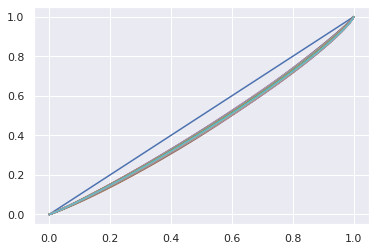

In [28]:
f, ax = plt.subplots()
ax.plot(Fn,Fn)
for c in lorenz_curves:
    ax.plot(Fn, c)


The compression of the Lorenze curves makes it difficult to ascertain the temporal pattern in inequality. Focusing explicilty on the Gini coefficients may shed more light on this evolution:

In [29]:
g69 = inequality.gini.Gini(pci_df['1969'].values)


In [30]:
g69.g

0.13553708123000455

In [31]:
years = [str(y) for y in range(1969, 2018)]
ginis = numpy.array([inequality.gini.Gini(pci_df[year].values).g for year in years])
years = numpy.array([int(y) for y in years])

In [32]:
gini_df = pandas.DataFrame(data = numpy.hstack([[years, ginis]]).T, columns=['Year', 'Gini'])
gini_df['Year'] = gini_df['Year'].astype(int)
gini_df.head()

,Year,Gini
0,1969,0.135537
1,1970,0.130055
2,1971,0.128522
3,1972,0.129104
4,1973,0.142146


In [33]:
gini_df.index = pandas.to_datetime(gini_df['Year'], format="%Y")
gini_df = gini_df.drop(columns=["Year"])

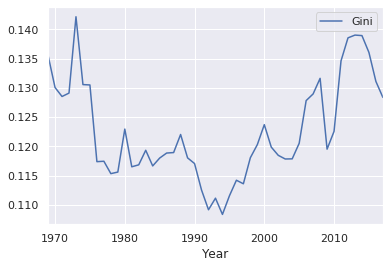

In [34]:
gini_df.plot(y=["Gini"])

MAYBE ADD 
One interesting note about the relationship between the Gini coefficient, the Loreznze curve, and the spatial distribution of incomes


### Theil's index

A third commonly used measure of inequality is Theil's $T$ given as:
$$T = \sum_{i=1}^m \left( \frac{y_i}{\sum_{i=1}^m y_i} \ln \left[ m \frac{y_i}{\sum_{i=1}^m y_i}\right] \right)$$
where $y_i$ is per-capita income in area $i$ among $m$ areas. In PySAL, we can calculate this index each year as:

In [35]:
gini_df['T'] = [inequality.theil.Theil(pci_df[str(y)]).T for y in years]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8c2f60940>,
      dtype=object)

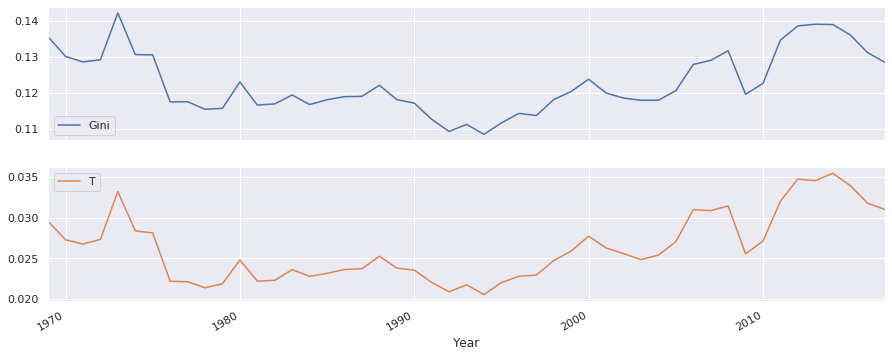

In [36]:
#gini_df.plot(figsize=(15,4))
gini_df.plot(subplots=True, figsize=(15,6))
#gini_df.plot(y=['Gini', 'T'], figsize=(15,4))

The time paths of the Gini and the Theil coefficients show striking
similarities, and, at first glance, this might suggest that the indices are
substitutes for one another. As we shall see below, however, each index has
properties that lend themselves to particular spatial extensions that provide
important complementarities.

## Personal versus Regional Income
There is a subtle but important distinction between the study of personal and
regional income inequality. To see this, we first need to express the
relationships between the two types of inequality. Consider a country composed
of $N$ individuals who are distributed over $m$ regions. Let $Y_l$ denote the
income of individual $l$. Total personal income in region $i$ is given as $Y_i =
\sum_{l \in i} Y_l$. Per-capita income in region $i$ is $y_i = \frac{Y_i}{N_i}$,
where $N_i$ is the number of individuals in region $i$.

At the national level,  the coefficient of variation as an index of  interpersonal income inequality would be:

$$CV_{nat} = \sqrt{\frac{\sum_{l=1}^N (Y_l - \bar{y})^2}{N}}$$

where $\bar{y}$ is national per-capita income. The key component here is the sum
of squares term, and unpacking this sheds light on personal versus regional
inequality question:

$$TSS = \sum_{l=1}^N (Y_l - \bar{y})^2$$

Focusing on an individual deviation: $\delta_l = Y_l - \bar{y}$, this is the contribution to inequality associated with individual $l$. We can break this into two components:

$$\delta_l = (Y_l - y_i) +  (y_i - \bar{y})$$

The first term is the difference between the individual's income and per-capita income in the individual's region of residence, while the second term is the difference between the region's per capita income and average national per capita income.

In regional studies, the intraregional personal income distribution is typically
not available. As a result, the assumption is often made that intraregional
personal inequality is zero. In other words, all individuals in the same region
have identical incomes. With this assumption in hand, the first term vanishes:
$Y_l -y_i = 0$, leading to: **FOOTNOTE:** It should also be noted that even at
the national scale, the analysis of interpersonal income inequality also relies
on aggregate data grouping individuals into income cohorts. See, for example,
Piketty, T. and E. Saez (2003) "Income inequality in the United States,
1913-1998", The Quarterly Journal of Economics, 118: 1-41.

$$
\begin{aligned}
TSS &= \sum_{l=1}^N (Y_l - \bar{y})^2 \\
    &= \sum_{l=1}^N \delta_l^2 \\
    &= \sum_{l=1}^N ((Y_l - y_i) +  (y_i - \bar{y}))^2 \\
    &= \sum_{l=1}^N (0 +  (y_i - \bar{y}))^2 \\
    &= \sum_{i=1}^m\sum_{l \in i}  (y_i - \bar{y})^2 \\
    &= \sum_{i=1}^m  [N_i(y_i - \bar{y})]^2
\end{aligned}
$$
This means that each individual in a region has an equal contribution to the
overall level of national interpersonal inequality, given by $(y_i - \bar{y})$,
while the region in question contributes $N_i(y_i - \bar{y})$. While it may seem
that the assumption of zero intraregional interepersonal income inequality is
overly restrictive, it serves to isolate the nature of interregional income
inequality. That is, inequality between places, rather than inequality between
people within those places. In essence, this strategy shifts the question up one
level in the spatial hierarchy by aggregating micro-level individual data to
areal units.



## Spatial Inequality

The analysis of regional income inequality is distinguished from the analysis of
national interpersonal income inequality in its focus on spatial units. As
regional incomes are embedded in geographical space, it is important to consider
the special nature of spatial data. In the regional inequality literature this
has been approaches in a number of ways.

### Spatial Autocorrelation
To get some insights on the spatial properties of regional income data, we can
turn to global measures of spatial autocorrelation that we encountered in
chapter XX. We use a queen spatial weights matrix to calculate Moran's I for
each year in the sample.

In [37]:
wq = pysal.lib.weights.Queen.from_dataframe(pci_df)

In [38]:
wq.n

3077

In [39]:
MI = [pysal.explore.esda.moran.Moran(pci_df[str(y)], wq) for y in years]

In [40]:
res = np.array([ (mi.I, mi.p_sim) for mi in MI])

In [41]:
res.shape

(49, 2)

In [42]:
res

array([[0.64908734, 0.001     ],
       [0.6474407 , 0.001     ],
       [0.62655115, 0.001     ],
       [0.60674267, 0.001     ],
       [0.64021995, 0.001     ],
       [0.62714455, 0.001     ],
       [0.61380412, 0.001     ],
       [0.60599811, 0.001     ],
       [0.61447525, 0.001     ],
       [0.61024325, 0.001     ],
       [0.58338636, 0.001     ],
       [0.59578544, 0.001     ],
       [0.59590793, 0.001     ],
       [0.59042268, 0.001     ],
       [0.56862305, 0.001     ],
       [0.57067704, 0.001     ],
       [0.58410467, 0.001     ],
       [0.59414605, 0.001     ],
       [0.59599186, 0.001     ],
       [0.59763186, 0.001     ],
       [0.585264  , 0.001     ],
       [0.55571103, 0.001     ],
       [0.53596867, 0.001     ],
       [0.52378165, 0.001     ],
       [0.50903512, 0.001     ],
       [0.5143574 , 0.001     ],
       [0.50329369, 0.001     ],
       [0.50819217, 0.001     ],
       [0.50088845, 0.001     ],
       [0.49307704, 0.001     ],
       [0.

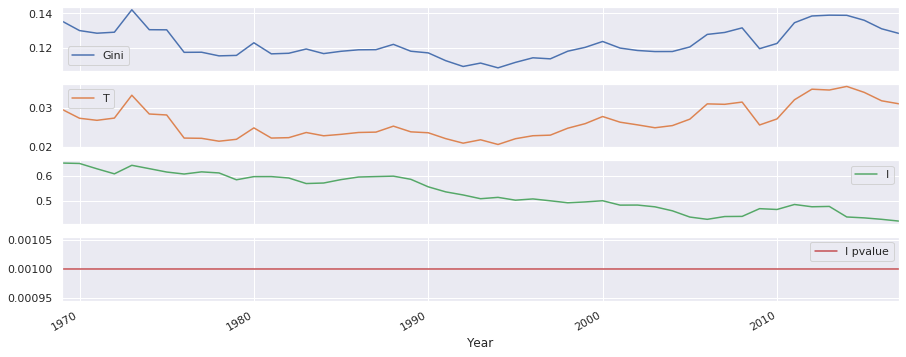

In [43]:
res_df = gini_df
res_df['I'] = res[:,0]
res_df['I pvalue'] = res[:,1]
_ = res_df[["Gini", "T", "I", "I pvalue"]].plot(subplots=True, figsize=(15,6))

In [44]:
res_df.columns

Index(['Gini', 'T', 'I', 'I pvalue'], dtype='object')

Several patterns emerge from the time series of Moran's I. First, the is a secular decline in the value of Moran's I. Second, despite this decline,  there is never a year in which the spatial autocorrelation is not statistically significant. In other words, there is a strong spatial structure in the distribution of regional incomes that needs to be accounted for when focusing on inequality questions.


### Decompositional Approaches

A popular approach to the analysis of inequality is to group the observations into mutually exclusive and exhaustive subsets in order to understand how much of the inequality is due to differences between members of the same subset versus between observations from different subsets. In the personal income literature, the groups have been defined in a number of ways: male vs. female, age cohorts, occupation types, race, etc. In regional applications, small areas are grouped into larger sets such that the resulting sets are spatially defined. **Add notions of connected components here and link to other chapters where appropriate.**


<!-- #region {"ein.tags": "worksheet-0", "slideshow": {"slide_type": "-"}} -->
### Regional Inequality Decompositions
One approach to incorporating spatial considerations into regional inequality extends this decompositional approach by using space to define the subgroups. This can be seen using   Theil's $T$, which we encountered previously and decomposing the index  into so called *between* and *within* regional inequality components.

Applied to a collection of observations on  per capita incomes for $m$ regional economies: $y = \left( y_1, y_2, \ldots, y_m \right)$, which are 
are grouped into $\omega$ mutually exclusive regions such that $\sum_{g=1}^{\omega} m_g=m$, where $m_g$ is the number of areas
assigned to region $g$, Theil's index from above can be rewritten as: 

$$
\begin{align}
T &= \sum_{i=1}^m \left( \frac{y_i}{\sum_{i=1}^m y_i} \ln \left[ m \frac{y_i}{\sum_{i=1}^m y_i}\right] \right) \\
  &= \left[ \sum_{g=1}^{\omega} s_{g} log(\frac{m}{m_g} s_g)  \right] + \left[ \sum_{g=1}^{\omega} s_g \sum_{i \in g} s_{i,g} log(m_g s_{i,g}) \right] \\
  &= B + W \\
\end{align}
$$

where $s_g = \frac{\sum_{i \in g} y_i}{\sum_i y_i}$, and   $s_{i,g} = y_i / \sum_{i \in g} y_i$. 

The first term is the between regions inequality component, and the second is the within regions inequality component.
The within region term is a weighted average of inequality between economies belonging to the same region.
Similar to what is done above for the case of interpersonal inequality, the
estimate of the between region (group) component of the decomposition is based on
setting the incomes of all economies (individuals )belonging to a region (group) equal to that of the
regional (group) average of these per capita incomes. Now, however, intraregional
inequality between economies within the same region is explicitly considered in
the second  component.


**Note:** The regional decomposition does not involve weighting the regions by their respective population. See  [Gluschenko (2018)](https://webvpn.ucr.edu/+CSCO+0075676763663A2F2F6A6A6A2E676E6171736261797661722E70627A++/doi/full/10.1080/17421772.2017.1343491) for further details. 


In [45]:
pci_df.columns

Index(['1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'ALAND', 'AWATER', 'CBSAFP', 'CLASSFP',
       'COUNTYFP', 'COUNTYNS', 'CSAFP', 'Descriptio', 'Descript_1', 'FUNCSTAT',
       'GEOID', 'GeoFIPS', 'GeoName', 'INTPTLAT', 'INTPTLON', 'IndustryCl',
       'LSAD', 'LineCode', 'METDIVFP', 'MTFCC', 'NAME', 'NAMELSAD', 'Region',
       'STATEFP', 'TableName', 'Unit', 'geometry'],
      dtype='object')

In [46]:
pandas.unique(pci_df['Region'])

array([3, 5, 8, 1, 2, 7, 4, 6])

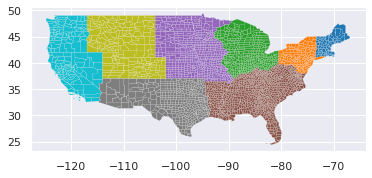

In [47]:
pci_df.plot(column='Region', categorical=True, linewidth=0.1)

In [48]:
region_df = pci_df.dissolve(by='STATEFP')

In [49]:
pandas.unique(region_df.Region)

array([5, 6, 8, 7, 1, 2, 3, 4])

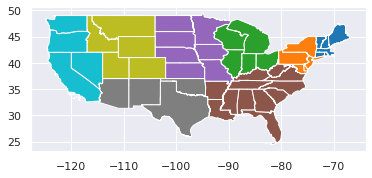

In [50]:
region_df.plot(column='Region', categorical=True)

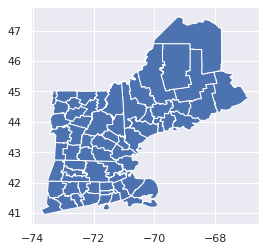

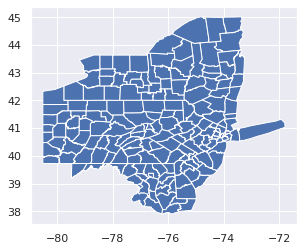

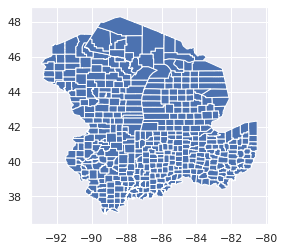

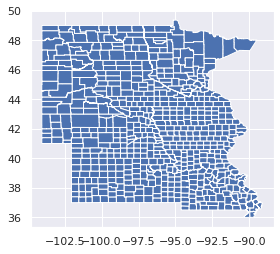

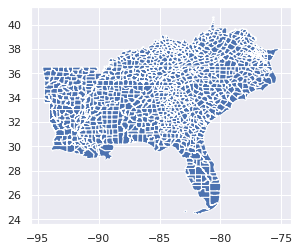

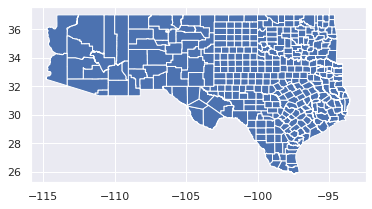

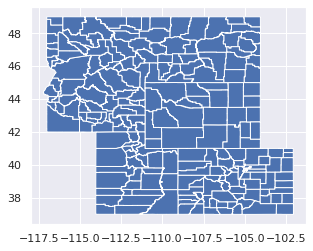

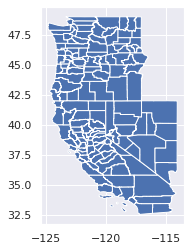

In [51]:
for region in range(1, 9):
    pci_df[pci_df.Region==region].plot()


In [52]:
region_names = ["New England",
               'Mideast', 'Great Lakes', 'Plains',
               'Southeast', 'Southwest', 'Rocky Mountain',
                'Far West']

In [53]:
pci_df.groupby('Region').mean()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,ALAND,AWATER,LineCode
Region,,,,,,,,,,,,,,,,,,,,,
1,3736.208955,3984.611940,4238.238806,4567.477612,4959.328358,5338.358209,5740.134328,6333.537313,6846.955224,7585.776119,...,46358.701493,48058.731343,48107.701493,50086.671642,52201.611940,53493.805970,55414.552239,2.423518e+09,3.592977e+08,3.0
2,3745.112360,4003.943820,4263.578652,4608.359551,5073.617978,5534.668539,5994.792135,6485.730337,7042.426966,7773.331461,...,41977.707865,43304.949438,43733.797753,45401.174157,47022.191011,47930.286517,49987.123596,1.614247e+09,1.943027e+08,3.0
3,3426.800459,3575.077982,3863.880734,4199.541284,4795.082569,5156.715596,5668.309633,6146.045872,6720.729358,7398.935780,...,35712.176606,36784.635321,37842.667431,38810.309633,39864.006881,40735.772936,41918.071101,1.441214e+09,3.468585e+08,3.0
4,3185.181230,3463.689320,3748.909385,4273.289644,5462.899676,5389.299353,5774.113269,5824.689320,6299.959547,7291.336570,...,41725.169903,43098.207120,44535.634304,44770.778317,44949.200647,44198.533981,44367.509709,2.127329e+09,5.344987e+07,3.0
5,2611.941120,2829.420849,3062.441120,3388.722008,3834.005792,4188.248069,4487.643822,4969.812741,5389.917954,6048.381274,...,31797.827220,32858.700772,33237.038610,34312.055985,35483.079151,36018.351351,37216.367761,1.302386e+09,9.926782e+07,3.0
6,2968.305040,3233.893899,3443.859416,3835.867374,4486.610080,4565.095491,5182.435013,5621.554377,6045.092838,6710.564987,...,35886.458886,37412.612732,38892.190981,41058.530504,40829.559682,39043.450928,40153.835544,3.842122e+09,6.343465e+07,3.0
7,3320.837209,3642.600000,3869.986047,4407.576744,5147.102326,5597.353488,5814.697674,6090.674419,6506.418605,7408.781395,...,37304.758140,39290.641860,40389.246512,42126.865116,43665.418605,43188.325581,44321.232558,6.158906e+09,7.368098e+07,3.0
8,4026.353333,4282.726667,4605.933333,5058.586667,5621.780000,6265.166667,6749.706667,7185.206667,7694.146667,8605.840000,...,38548.673333,39962.253333,40579.226667,42877.700000,45247.820000,46248.953333,47928.013333,7.392819e+09,2.725763e+08,3.0


In [54]:
regimes = pci_df['Region']
ys = [str(y) for y in years]

## Time series plot of the regional means (WIP)

In [55]:
rdf = pci_df.groupby('Region').mean().transpose()

In [56]:
rdf.shape

(52, 8)

In [57]:
rdf.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='Region')

In [58]:
theil_dr = pysal.explore.inequality.theil.TheilD(pci_df[ys].values, regimes)

In [59]:
theil_dr.bg

array([0.00913759, 0.00822371, 0.00782508, 0.00767872, 0.01022404,
       0.00812432, 0.00783763, 0.00572192, 0.00559778, 0.00549276,
       0.00511292, 0.00565294, 0.00486341, 0.00465598, 0.00473723,
       0.00423896, 0.00427742, 0.00452794, 0.00465081, 0.0045606 ,
       0.00466703, 0.00411722, 0.00365779, 0.00341614, 0.00326612,
       0.00312039, 0.00325658, 0.00359213, 0.00326984, 0.00362352,
       0.00381669, 0.00435476, 0.00398438, 0.00401826, 0.00396334,
       0.00394126, 0.00352894, 0.00362163, 0.00399958, 0.00449142,
       0.00434706, 0.00470395, 0.006389  , 0.0064173 , 0.00693559,
       0.00644317, 0.00591177, 0.00553469, 0.00528127])

In [60]:
res_df['bgr'] = theil_dr.bg
res_df['wgr'] = theil_dr.wg

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8c2d6a208>,
      dtype=object)

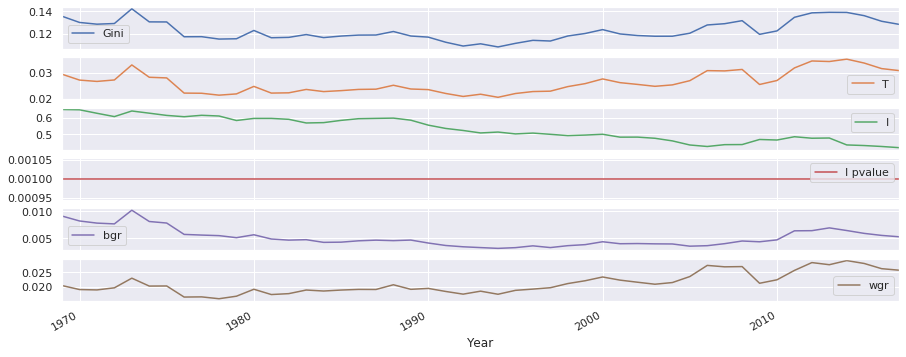

In [61]:
res_df.plot(subplots=True, figsize=(15,6))

In [62]:

numpy.random.seed(12345)
theil_drs = pysal.explore.inequality.theil.TheilDSim(pci_df[ys].values, regimes, 999)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8c2d42860>,
      dtype=object)

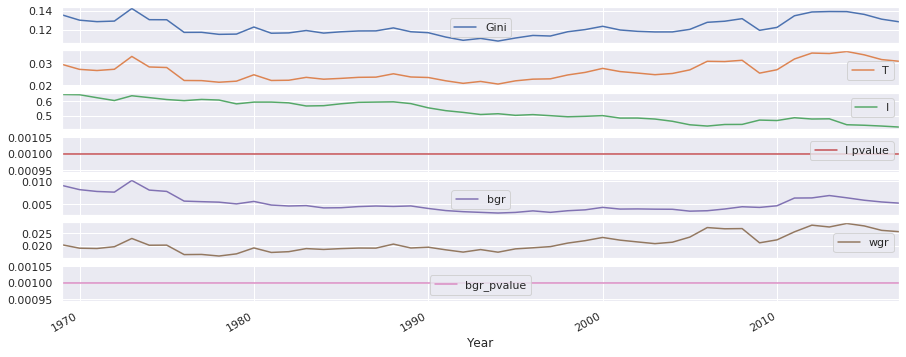

In [63]:
res_df['bgr_pvalue'] = theil_drs.bg_pvalue
res_df.plot(subplots=True, figsize=(15,6))

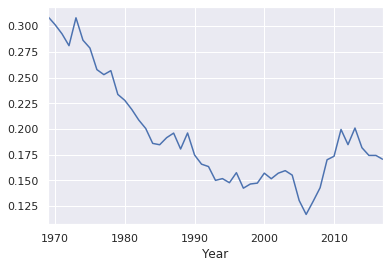

In [64]:
res_df['bgr_share'] = res_df['bgr'] / res_df['T']
res_df['bgr_share'].plot()

## Decomposition Using States

In [65]:
theil_ds = pysal.explore.inequality.theil.TheilD(pci_df[ys].values, pci_df['STATEFP'])

In [66]:
theil_ds.T

array([0.02956245, 0.0272826 , 0.0267571 , 0.02732865, 0.03318841,
       0.02837545, 0.0281248 , 0.02220418, 0.02214208, 0.02139889,
       0.02188909, 0.02481497, 0.02220707, 0.02231055, 0.02363097,
       0.02279176, 0.02316332, 0.0236385 , 0.023731  , 0.02526223,
       0.02380102, 0.02356529, 0.02206142, 0.02089816, 0.02176745,
       0.02056457, 0.0220403 , 0.02280536, 0.02295407, 0.02473368,
       0.02590107, 0.02772869, 0.0262756 , 0.02559157, 0.02485007,
       0.02540392, 0.02704911, 0.03096952, 0.0308576 , 0.03143146,
       0.02556138, 0.02711406, 0.03202027, 0.03473141, 0.03452092,
       0.03544577, 0.03392023, 0.03175856, 0.03098273])

In [67]:
theil_ds.bg

array([0.01202405, 0.01098113, 0.01061615, 0.01071169, 0.01460935,
       0.01174436, 0.01105702, 0.00815238, 0.00775735, 0.00776747,
       0.00712734, 0.00872468, 0.00756751, 0.00769704, 0.00793969,
       0.00740442, 0.00760461, 0.00797024, 0.00823797, 0.00882368,
       0.00822786, 0.00749844, 0.00647532, 0.00599946, 0.00588982,
       0.00554082, 0.00588671, 0.00611632, 0.00609094, 0.00646917,
       0.00697235, 0.00771176, 0.00735026, 0.00735872, 0.00738993,
       0.00719819, 0.00701849, 0.00759005, 0.00812707, 0.00871506,
       0.0079286 , 0.00889664, 0.01146386, 0.01226537, 0.01195608,
       0.01128462, 0.01076572, 0.00978201, 0.00924145])

In [68]:
res_df['bgs_share'] = theil_ds.bg / theil_ds.T
res_df['bgs'] = theil_ds.bg

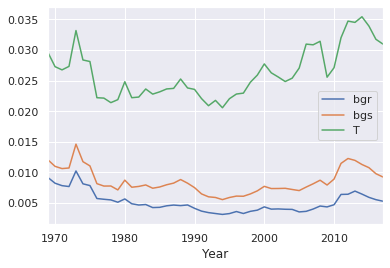

In [69]:
res_df[['bgr', 'bgs', 'T']].plot()

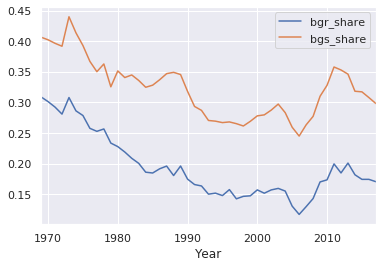

In [70]:
res_df[['bgr_share', 'bgs_share']].plot()

In [71]:
res_df[['bgr_share', 'bgs_share','T']].corr()

,bgr_share,bgs_share,T
bgr_share,1.000000,0.942285,0.057848
bgs_share,0.942285,1.000000,0.183847
T,0.057848,0.183847,1.000000


- inequality between the states is larger than inequality between regions
- inequality within states is smaller than inequality within regions
- time series of the between component are similar for regional and state partitions of the counties
- correlation of between share and overall inequality is higher at the state level than the region level

### Intraregional inequality trends

Theil applied to each of the regions.

Plot the eight series

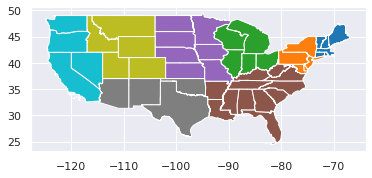

In [72]:
region_df.plot(column='Region', categorical=True)

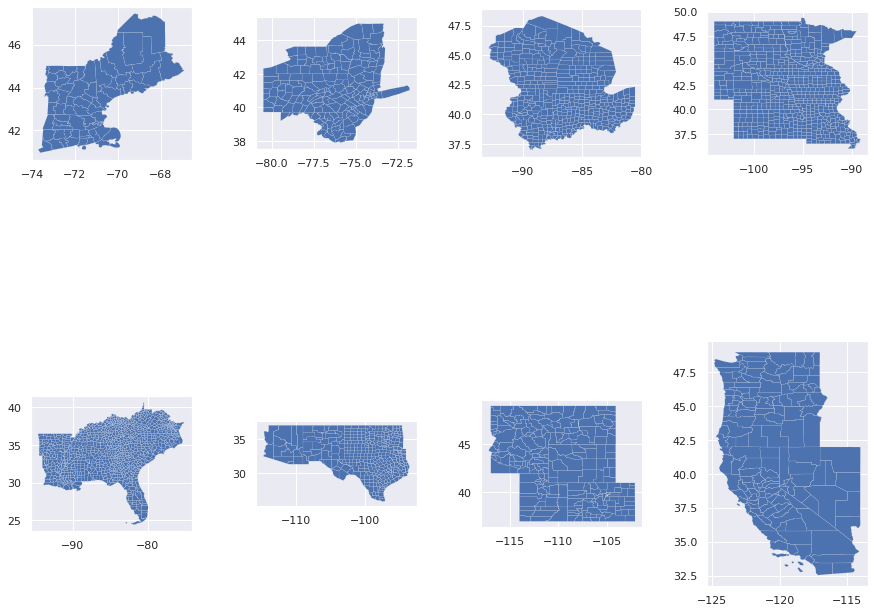

In [73]:
fig = plt.figure(figsize=(15,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 9):
    ax = fig.add_subplot(2, 4, i)
    rdf = pci_df[pci_df.Region==i]
    rdf.plot(ax=ax, linewidth=0.1)
    

In [74]:
region_names = ["New England",
               'Mideast', 'Great Lakes', 'Plains',
               'Southeast', 'Southwest', 'Rocky Mountain',
                'Far West']
results = []
table = []
for region in range(1, 9):
    rdf = pci_df[pci_df.Region==region]
    #rdf.plot()
    print(region, len(pandas.unique(rdf.STATEFP)), rdf.shape[0])
    table.append([region, region_names[region-1], len(pandas.unique(rdf.STATEFP)), rdf.shape[0]])
    #results.append(pysal.explore.inequality.theil.TheilDSim(rdf[ys].values, rdf.STATEFP,999))
    

1 6 67
2 6 178
3 5 436
4 7 618
5 12 1036
6 4 377
7 5 215
8 4 150


In [75]:
summary = pandas.DataFrame(table)

In [76]:
summary

,0,1,2,3
0,1,New England,6,67
1,2,Mideast,6,178
2,3,Great Lakes,5,436
3,4,Plains,7,618
4,5,Southeast,12,1036
5,6,Southwest,4,377
6,7,Rocky Mountain,5,215
7,8,Far West,4,150


In [77]:
summary.columns = [ "Region", "Name", "States", "Counties"]

In [78]:
summary

,Region,Name,States,Counties
0,1,New England,6,67
1,2,Mideast,6,178
2,3,Great Lakes,5,436
3,4,Plains,7,618
4,5,Southeast,12,1036
5,6,Southwest,4,377
6,7,Rocky Mountain,5,215
7,8,Far West,4,150


### Intra regional inequality
We can take a closer look at the within region inequality component by dissagregating the total value from XX into that occuring within each of the 8 regions. This can be done by calculating the global Theil index on the counties belonging to a given region.

In [79]:
region_names = ["New England",
               'Mideast', 'Great Lakes', 'Plains',
               'Southeast', 'Southwest', 'Rocky Mountain',
                'Far West']
results = []
table = []
for region in range(1, 9):
    rdf = pci_df[pci_df.Region==region]
    #rdf.plot()
    print(region, len(pandas.unique(rdf.STATEFP)), rdf.shape[0])
    table.append([region, region_names[region-1], len(pandas.unique(rdf.STATEFP)), rdf.shape[0]])
    results.append(pysal.explore.inequality.theil.TheilDSim(rdf[ys].values, rdf.STATEFP,999))
    

1 6 67
2 6 178
3 5 436
4 7 618
5 12 1036
6 4 377
7 5 215
8 4 150


In [80]:
r1 = results[0]

In [81]:
r1.bg_pvalue

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001])

In [82]:
r1.bg

array([[0.00905797, 0.00793991, 0.00784536, ..., 0.0142647 , 0.01453823,
        0.01478042],
       [0.00069922, 0.00060126, 0.00061298, ..., 0.00140586, 0.00143189,
        0.00147293],
       [0.00099987, 0.0009492 , 0.00071565, ..., 0.00118387, 0.00117219,
        0.00119068],
       ...,
       [0.00098307, 0.00090302, 0.00094634, ..., 0.00249735, 0.00252576,
        0.00247384],
       [0.00051996, 0.00047563, 0.00044819, ..., 0.00236406, 0.00251486,
        0.00250307],
       [0.00258669, 0.0023153 , 0.00231772, ..., 0.00560273, 0.00563963,
        0.00574243]])

In [83]:
Tr = pandas.DataFrame([result.T for result in results]).transpose()

In [84]:
Tr.head()

,0,1,2,3,4,5,6,7
0,0.014585,0.018776,0.012075,0.015233,0.028101,0.029590,0.018616,0.013005
1,0.013423,0.018680,0.010455,0.015837,0.024661,0.025866,0.020219,0.013539
2,0.013806,0.019843,0.010493,0.014355,0.024532,0.027463,0.018711,0.014485
3,0.014890,0.019747,0.010600,0.016188,0.023113,0.032705,0.019762,0.014310
4,0.012113,0.017861,0.011965,0.027926,0.020512,0.038443,0.027356,0.014854


In [85]:
region_names = ["New England",
               'Mideast', 'Great Lakes', 'Plains',
               'Southeast', 'Southwest', 'Rocky Mountain',
                'Far West']

In [86]:
Tr = Tr.rename(columns=dict([(i,name) for i,name in enumerate(region_names)]))

In [87]:
pinned0 = Tr.divide(Tr.ix[0])

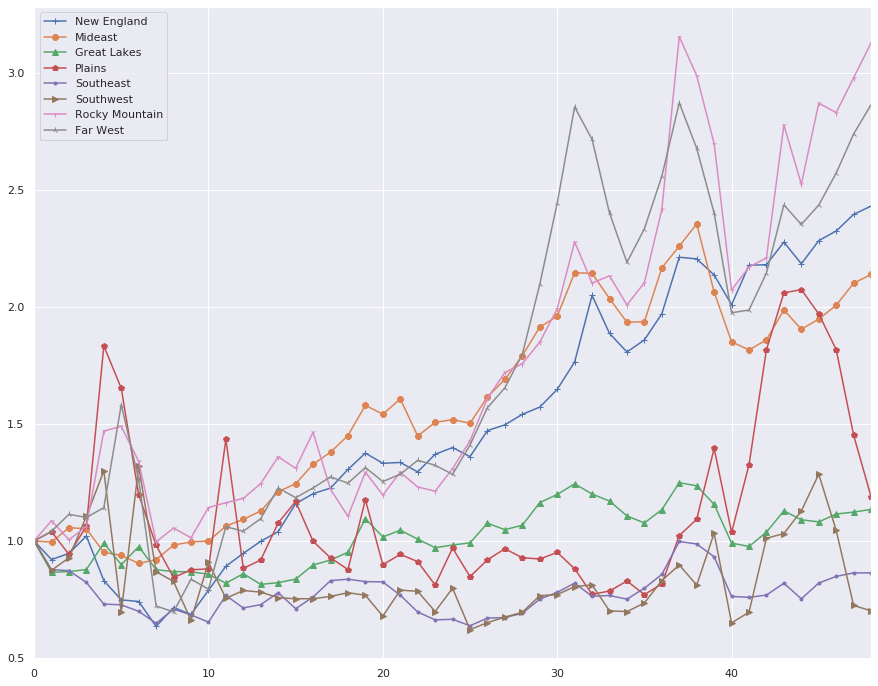

In [88]:
import pandas as pd

df = pinned0
markers = [ "+", "8", "^", "p", ".", ">", "1", '2']
ax = df.plot(kind='line', figsize=(15, 12))
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')

Unpacking the intraregional inequality term reveals that the original decomposition of inequality into within and between regions actually masks a great deal of heterogeneity in the internal inequality dynamics across the eight regions. Put another way, the overall trend in the aggregate within region component above is an average of the trends exhibited in each of the eight regions. There are two distinct groups of regions in this regard. The first consists of regions where the inequality between counties within each region has been increasing over the sample period. This group is composed of the New England,  Mideast, Far West, and Rocky Mountains regions. The second group are those regions where intraregional inequality has remained stable, or even decreased, over time. The Great Lakes, Southeast, and Southwest regions compose this group. The one outlier region is the Plains which does not fall neatly into either of these two groups.

In [89]:
theil_ds = pysal.explore.inequality.theil.TheilDSim(rdf[ys].values, rdf.STATEFP, 999)

In [90]:
len(theil_ds.bg[0])

49

In [91]:
theil_ds.bg[0]

array([0.00295158, 0.0027086 , 0.00279838, 0.00211417, 0.00204306,
       0.00037282, 0.00034725, 0.00057796, 0.00102812, 0.00107788,
       0.00067789, 0.00117061, 0.00168775, 0.00206328, 0.00127034,
       0.00148108, 0.00192297, 0.00159865, 0.00257352, 0.00298896,
       0.00259718, 0.00202416, 0.00198901, 0.00166313, 0.00129544,
       0.00149066, 0.00133233, 0.0010449 , 0.00123431, 0.00191652,
       0.00289866, 0.00327374, 0.00390488, 0.00374813, 0.00335202,
       0.00368984, 0.0040759 , 0.00424701, 0.00362028, 0.00255708,
       0.00236641, 0.00293262, 0.00311549, 0.00316963, 0.00357701,
       0.00390474, 0.00433766, 0.00511215, 0.00540712])

In [92]:
theil_ds.bg_pvalue

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.498, 0.414, 0.043, 0.002,
       0.002, 0.029, 0.009, 0.001, 0.001, 0.015, 0.006, 0.001, 0.006,
       0.001, 0.001, 0.001, 0.001, 0.002, 0.005, 0.017, 0.012, 0.043,
       0.1  , 0.081, 0.031, 0.007, 0.008, 0.001, 0.001, 0.002, 0.001,
       0.001, 0.001, 0.005, 0.016, 0.007, 0.002, 0.002, 0.004, 0.003,
       0.002, 0.002, 0.002, 0.002])

In [93]:
theil_ds.T

array([0.01300504, 0.01353897, 0.01448477, 0.0143102 , 0.01485378,
       0.02057958, 0.01640312, 0.009388  , 0.00906217, 0.01087958,
       0.01032465, 0.01379389, 0.0135445 , 0.01424603, 0.01594675,
       0.01540832, 0.01594909, 0.0165648 , 0.01621477, 0.01708498,
       0.01630393, 0.01671203, 0.0174846 , 0.01721203, 0.01670732,
       0.01833721, 0.02040777, 0.02151451, 0.02337549, 0.02726335,
       0.03177261, 0.03712272, 0.03531719, 0.0312238 , 0.02848151,
       0.03035599, 0.03326946, 0.03735221, 0.03482165, 0.03122007,
       0.02568502, 0.0258377 , 0.02789644, 0.03168081, 0.03059115,
       0.03167113, 0.03345198, 0.03562125, 0.03725178])

In [94]:
theil_ds.bg/theil_ds.T

array([[0.22695684, 0.20005983, 0.19319448, ..., 0.12966837, 0.14351415,
        0.14515059],
       [0.01706968, 0.00984034, 0.00380051, ..., 0.01280664, 0.01259456,
        0.01206383],
       [0.02823692, 0.01668119, 0.01187254, ..., 0.01333787, 0.01275938,
        0.01212704],
       ...,
       [0.01080717, 0.01696786, 0.01089573, ..., 0.01250036, 0.01580922,
        0.01574904],
       [0.03620417, 0.03990198, 0.02734309, ..., 0.06413847, 0.06259696,
        0.06532176],
       [0.03414419, 0.03321956, 0.03178242, ..., 0.02971032, 0.0285123 ,
        0.02808748]])

In [95]:
wgp_ds = theil_ds.wg[0]/theil_ds.T

In [96]:
wgp_dr = theil_ds.wg[0]/theil_ds.T

In [97]:
wgp_dr.shape

(49,)

In [98]:
res_df.shape

(49, 10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8c2bf73c8>,
      dtype=object)

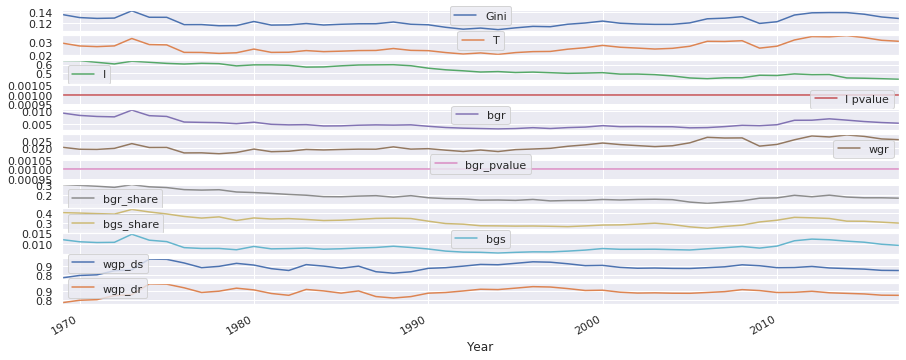

In [99]:
wgp_ds.shape = (49, 1)
res_df['wgp_ds'] = wgp_ds
wgp_dr.shape = (49, 1)

res_df['wgp_dr'] = wgp_dr

res_df.plot(subplots=True, figsize=(15,6))

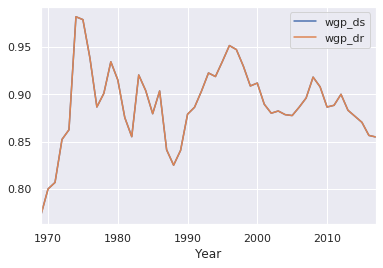

In [100]:
res_df.plot(y=['wgp_ds','wgp_dr'])

In [101]:
res_df.head()

,Gini,T,I,I pvalue,bgr,wgr,bgr_pvalue,bgr_share,bgs_share,bgs,wgp_ds,wgp_dr
Year,,,,,,,,,,,,
1969-01-01,0.135537,0.029562,0.649087,0.001,0.009138,0.020425,0.001,0.309095,0.406734,0.012024,0.773043,0.773043
1970-01-01,0.130055,0.027283,0.647441,0.001,0.008224,0.019059,0.001,0.301427,0.402496,0.010981,0.799940,0.799940
1971-01-01,0.128522,0.026757,0.626551,0.001,0.007825,0.018932,0.001,0.292449,0.396760,0.010616,0.806806,0.806806
1972-01-01,0.129104,0.027329,0.606743,0.001,0.007679,0.019650,0.001,0.280977,0.391958,0.010712,0.852261,0.852261
1973-01-01,0.142146,0.033188,0.640220,0.001,0.010224,0.022964,0.001,0.308061,0.440194,0.014609,0.862455,0.862455


In [102]:
theil_ds.T

array([0.01300504, 0.01353897, 0.01448477, 0.0143102 , 0.01485378,
       0.02057958, 0.01640312, 0.009388  , 0.00906217, 0.01087958,
       0.01032465, 0.01379389, 0.0135445 , 0.01424603, 0.01594675,
       0.01540832, 0.01594909, 0.0165648 , 0.01621477, 0.01708498,
       0.01630393, 0.01671203, 0.0174846 , 0.01721203, 0.01670732,
       0.01833721, 0.02040777, 0.02151451, 0.02337549, 0.02726335,
       0.03177261, 0.03712272, 0.03531719, 0.0312238 , 0.02848151,
       0.03035599, 0.03326946, 0.03735221, 0.03482165, 0.03122007,
       0.02568502, 0.0258377 , 0.02789644, 0.03168081, 0.03059115,
       0.03167113, 0.03345198, 0.03562125, 0.03725178])

In [103]:
theil_ds.T

array([0.01300504, 0.01353897, 0.01448477, 0.0143102 , 0.01485378,
       0.02057958, 0.01640312, 0.009388  , 0.00906217, 0.01087958,
       0.01032465, 0.01379389, 0.0135445 , 0.01424603, 0.01594675,
       0.01540832, 0.01594909, 0.0165648 , 0.01621477, 0.01708498,
       0.01630393, 0.01671203, 0.0174846 , 0.01721203, 0.01670732,
       0.01833721, 0.02040777, 0.02151451, 0.02337549, 0.02726335,
       0.03177261, 0.03712272, 0.03531719, 0.0312238 , 0.02848151,
       0.03035599, 0.03326946, 0.03735221, 0.03482165, 0.03122007,
       0.02568502, 0.0258377 , 0.02789644, 0.03168081, 0.03059115,
       0.03167113, 0.03345198, 0.03562125, 0.03725178])

<!-- #region {"ein.tags": "worksheet-0", "slideshow": {"slide_type": "-"}} -->


### Spatializing Classic Measures

We now turn to two newer spatial analytics that extend a selction of the classic (a-spatial) inequality measures above to introduce a spatially explicit focus.

#### Spatial Gini

The first spatial extension was introduced by Rey and Smith (2013) and is designed to consider the role of adjacency in a decomposition of the Gini index of inequality. More specifically, The Gini in mean xxx is rewritten.

- point out theil decomposition ignores spatial interactions between counties, both within a region and between region
- spatial gini as a complement

In [104]:
from pysal.explore.inequality.gini import Gini_Spatial

In [105]:
wq.transform = 'B'

In [106]:
wq.pct_nonzero

0.19389668004481234

In [107]:
wq.s0

18358.0

In [108]:
wq.n * wq.n

9467929

In [109]:
wq.n

3077

In [110]:
W = wq.full()[0]

In [111]:
W.sum()

18358.0

In [112]:
9467929 * wq.pct_nonzero / 100

18358.0

In [113]:
18358/2

9179.0

In [114]:
wq.histogram

[(1, 2),
 (2, 10),
 (3, 62),
 (4, 256),
 (5, 679),
 (6, 1104),
 (7, 680),
 (8, 229),
 (9, 43),
 (10, 9),
 (11, 1),
 (12, 0),
 (13, 1),
 (14, 1)]

In [115]:
hist = np.array(wq.histogram)

In [116]:
(hist[:,0]*hist[:,1]).sum()

18358

In [117]:
gs69 = Gini_Spatial(pci_df['1969'], wq)

In [118]:
gs69.g

0.13553708123000455

In [119]:
gs69.p_sim

0.01

In [120]:
gs = [Gini_Spatial(pci_df[y], wq) for y in ys]

In [121]:
gs_array = np.array([(gsi.e_wcg, gsi.wcg, gsi.z_wcg, gsi.p_sim) for gsi in gs])

In [122]:
gs_array

array([[7.92720475e+09, 7.93416705e+09, 7.77712626e+01, 1.00000000e-02],
       [8.19177428e+09, 8.19877831e+09, 6.62890115e+01, 1.00000000e-02],
       [8.71357593e+09, 8.72084736e+09, 6.68513380e+01, 1.00000000e-02],
       [9.72292997e+09, 9.73123725e+09, 6.24446900e+01, 1.00000000e-02],
       [1.24984269e+10, 1.25099023e+10, 9.20396338e+01, 1.00000000e-02],
       [1.21285827e+10, 1.21390126e+10, 6.47767593e+01, 1.00000000e-02],
       [1.31102701e+10, 1.31213918e+10, 6.99085227e+01, 1.00000000e-02],
       [1.26275073e+10, 1.26375368e+10, 8.28880935e+01, 1.00000000e-02],
       [1.36727181e+10, 1.36834255e+10, 6.02483350e+01, 1.00000000e-02],
       [1.50925337e+10, 1.51044382e+10, 6.25363962e+01, 1.00000000e-02],
       [1.67647183e+10, 1.67775021e+10, 5.96736128e+01, 1.00000000e-02],
       [1.91347322e+10, 1.91493549e+10, 5.83239879e+01, 1.00000000e-02],
       [2.05396521e+10, 2.05555047e+10, 6.19928656e+01, 1.00000000e-02],
       [2.17375545e+10, 2.17543710e+10, 5.68741903e

In [123]:
gs69.wcg

7934167045.999999

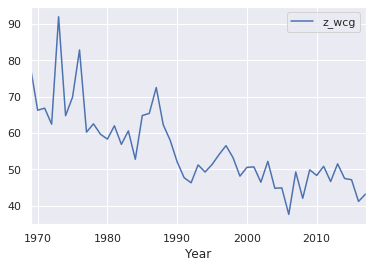

In [124]:
res_df['z_wcg'] = gs_array[:,2]
res_df.plot(y=['z_wcg'])

#### Spatial 20:20

In [125]:
ranks = pci_df.rank()

In [126]:
for year in years:
    pci_df["{}_rank".format(year)] = pci_df[str(year)].rank(method='first')

In [127]:
ridx_20 = int(.2 * 3077)
ridx_80 = int(.8 * 3077)
ridx_20, ridx_80

(615, 2461)

In [128]:
df = pci_df
df['1969_rank']

0       2691.0
1       2209.0
2       1972.0
3       1040.0
4        992.0
         ...  
3072    1599.0
3073    3020.0
3074     635.0
3075    1925.0
3076    2849.0
Name: 1969_rank, Length: 3077, dtype: float64

In [129]:
df[df['1969_rank']==615]

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008_rank,2009_rank,2010_rank,2011_rank,2012_rank,2013_rank,2014_rank,2015_rank,2016_rank,2017_rank
2999,2444,2562,2719,3015,3241,3665,4208,4881,5581,6407,...,572.0,581.0,435.0,341.0,252.0,182.0,249.0,274.0,328.0,261.0


In [130]:
df.index[df['1969_rank']==615].tolist()

[2999]

In [131]:
idx_20 = []
idx_80 = []
for year in years:
    column = "{}_rank".format(year)
    idx_20_i = df.index[df[column]==ridx_20]
    idx_20.extend(idx_20_i)
    idx_80_i = df.index[df[column]==ridx_80]
    idx_80.extend(idx_80_i)

In [132]:
len(idx_20)

49

In [133]:
len(years)

49

In [134]:
idx_20[0], idx_80[0]

(2999, 853)

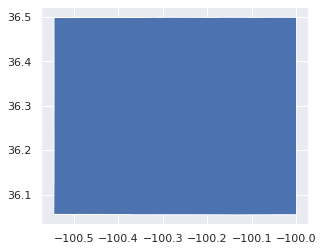

In [135]:
df.loc[[8999, 2561], :].plot()

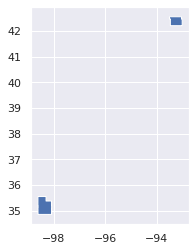

In [136]:
df.loc[[idx_20[-1], idx_80[-1]], :].plot()

In [137]:
import geopandas as gpd
from shapely.geometry import Point,Polygon
geom=[Point(xy) for xy in zip([117.454361,117.459880],[38.8459879,38.846255])]
ldf=gpd.GeoDataFrame(geometry=geom,crs={'init':'epsg:4326'})
ldf.to_crs(epsg=3310,inplace=True)
l=gdf.distance(ldf.shift())
print(l)

0                NaN
1       9.956789e+06
2                NaN
3                NaN
4                NaN
            ...     
3072             NaN
3073             NaN
3074             NaN
3075             NaN
3076             NaN
Length: 3077, dtype: float64


In [138]:
ldf = df.to_crs({'init':'epsg:4326'})

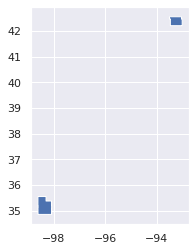

In [139]:
ldf.loc[[idx_20[-1], idx_80[-1]], :].plot()

In [140]:
ldf.to_crs(epsg=3310,inplace=True)


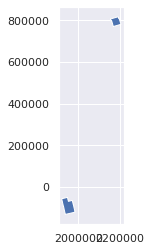

In [141]:
ldf.loc[[idx_20[-1], idx_80[-1]], :].plot()

In [142]:
small = ldf.loc[[idx_20[-1], idx_80[-1]], :]

In [143]:
small

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008_rank,2009_rank,2010_rank,2011_rank,2012_rank,2013_rank,2014_rank,2015_rank,2016_rank,2017_rank
2067,2524,2822,2889,3272,4291,4187,4692,4866,4838,5573,...,443.0,368.0,413.0,565.0,677.0,793.0,911.0,671.0,336.0,615.0
802,3857,4191,4002,4543,5992,6032,6548,6748,7088,8623,...,2648.0,2470.0,2523.0,2691.0,2725.0,2641.0,2607.0,2543.0,2387.0,2461.0


In [144]:
small.distance(small.shift()).values[-1]

850261.9196986001

In [145]:
small.geometry.centroid

2067    POINT (1951075.651540128 -92377.34360965305)
802      POINT (2180153.890714678 794694.7258680048)
dtype: object

In [146]:
idxs = zip(idx_20, idx_80)
distances = []
for idx in idxs:
    o,d = idx
    #print(o,d, idx)
    pair = df.loc[idx, :]
    d = pair.distance(pair.shift()).values[-1]
    distances.append(d)

In [147]:
distances

[5.793494382777284,
 14.11115326544592,
 23.2298009066525,
 40.11641752788748,
 20.914297628557865,
 15.407105868272607,
 15.062971646920277,
 5.211649001807871,
 6.775426703442077,
 20.44265510167664,
 26.634752051829775,
 12.073695525805052,
 19.652499316239574,
 30.230796317568768,
 8.64932110490182,
 17.265616788606682,
 19.71670513883587,
 5.524698660218939,
 11.600260332271942,
 5.087227637574814,
 9.801452050512967,
 21.28086269714102,
 6.908859229154765,
 2.6155873939000664,
 5.117607798677233,
 13.553946040774992,
 18.33894677181762,
 13.402089350099104,
 6.850039879449605,
 37.52152272031369,
 6.2350626620115,
 9.94556852242646,
 6.351398267403174,
 7.822608143168172,
 20.866735819375897,
 28.401936409641596,
 11.916935086505633,
 16.70377904984774,
 20.862802519703873,
 7.243244383111751,
 5.112943017199099,
 11.10901592550902,
 19.917613899026676,
 13.590977880673961,
 27.178095806423322,
 4.763282149202798,
 5.289851836809796,
 10.360359657532838,
 8.234454089168326]

In [148]:
idxs = zip(idx_20, idx_80)

len(distances), len(years), len(list(idxs))
gini_df['s_dist'] = numpy.array(distances)

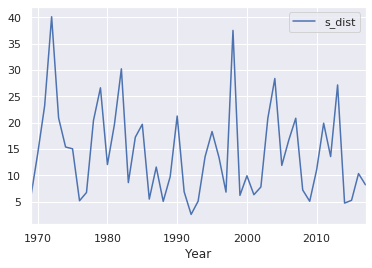

In [149]:
gini_df.plot(y=["s_dist"])

In [150]:
idxs = numpy.array(list(zip(idx_20, idx_80)))
idxs

array([[2999,  853],
       [ 305, 1810],
       [1661,  264],
       [ 352, 2770],
       [ 333, 2330],
       [2886, 1313],
       [ 465, 1666],
       [1500,  684],
       [2241,  667],
       [2688, 2200],
       [ 320, 1587],
       [2980, 1456],
       [ 462, 3041],
       [2999, 2213],
       [ 436,  555],
       [1168, 1302],
       [1574, 1637],
       [2127,  810],
       [ 453,    6],
       [1975,  434],
       [  47,  924],
       [1343, 2890],
       [ 174, 2621],
       [ 633, 2359],
       [2059, 2650],
       [ 130,  882],
       [1343, 1878],
       [1004, 1345],
       [  97,  591],
       [ 486, 2763],
       [ 965, 1233],
       [1624,  822],
       [ 206,  495],
       [1448,   48],
       [1231, 3021],
       [2644, 2779],
       [ 888, 2856],
       [2979,  755],
       [2355, 1960],
       [1655,  803],
       [1229,   37],
       [1410, 1653],
       [ 179, 1770],
       [ 140, 2807],
       [ 247,  948],
       [1056, 1490],
       [1034,   33],
       [2085,

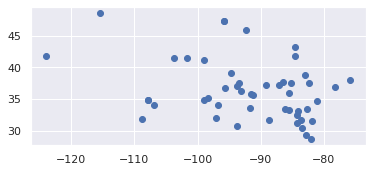

In [151]:
df.loc[idxs[:,0],:].centroid.plot()

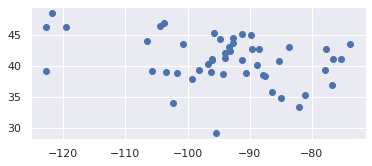

In [152]:
df.loc[idxs[:,1],:].centroid.plot()

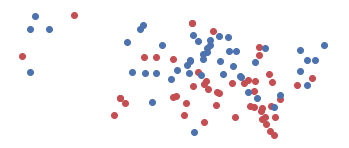

In [153]:

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
df.loc[idxs[:,0],:].centroid.plot(ax=ax, color='r')
df.loc[idxs[:,1],:].centroid.plot(ax=ax, color='b')
ax.set_axis_off()



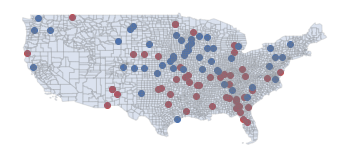

In [154]:

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
df.loc[idxs[:,0],:].centroid.plot(ax=ax, color='r')
df.loc[idxs[:,1],:].centroid.plot(ax=ax, color='b')
gdf.plot(ax=ax,edgecolor='gray', alpha=0.2)
ax.set_axis_off()



## Rank paths

In [155]:
from shapely.geometry import LineString

In [156]:
ls20 = geopandas.GeoSeries(LineString(df.loc[idxs[:,0],:].centroid.tolist()))
ls80 = geopandas.GeoSeries(LineString(df.loc[idxs[:,1],:].centroid.tolist()))

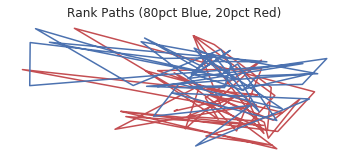

In [157]:

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
ls20.plot(ax=ax, color='r', label='20p')
ls80.plot(ax=ax, color='b')
#gdf.plot(ax=ax,edgecolor='gray', alpha=0.2)
plt.title('Rank Paths (80pct Blue, 20pct Red)')
ax.set_axis_off()



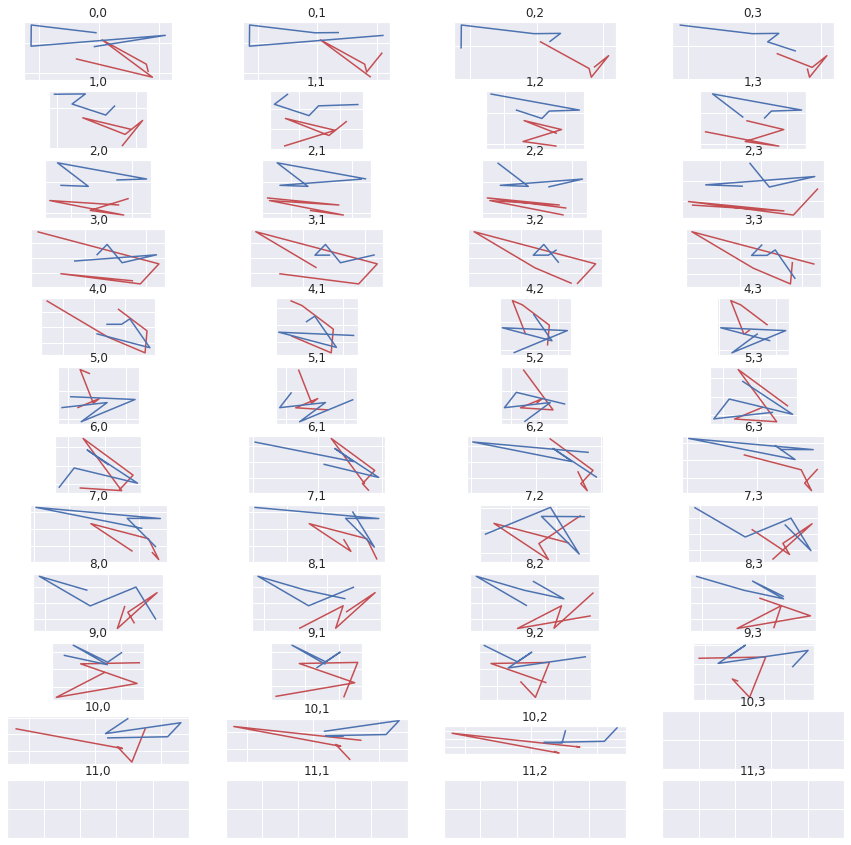

In [158]:
columns = 4
rows = 12
fig, ax_array = plt.subplots(rows, columns, squeeze=False, figsize=(15,15))
year=0
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title('{},{}'.format(i,j))
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        if year < 43:
            ls20 = geopandas.GeoSeries(LineString(df.loc[idxs[:,0],:].centroid.tolist()[year:year+5]))
            ls20.plot(ax=axes, color='r', label='20p')
            ls80 = geopandas.GeoSeries(LineString(df.loc[idxs[:,1],:].centroid.tolist()[year:year+5]))
            ls80.plot(ax=axes, color='b', label='20p')
    
        year += 1
#         axes.plot(you_data_goes_here,'r-')
        #axes.set_aspect('equal')
plt.show()

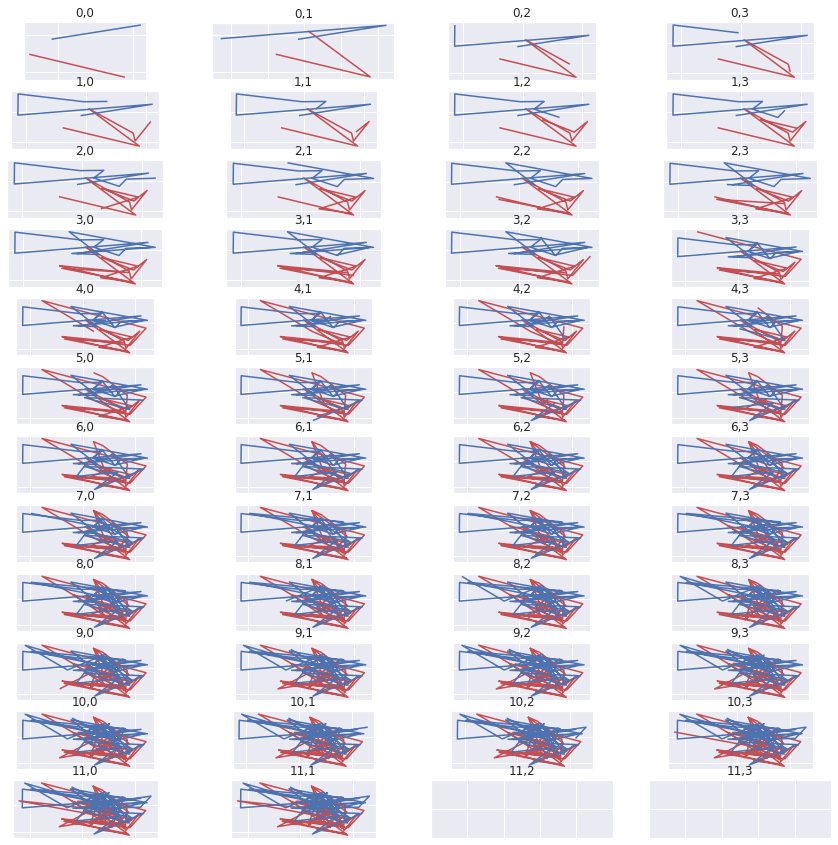

In [159]:
columns = 4
rows = 12
fig, ax_array = plt.subplots(rows, columns, squeeze=False, figsize=(15,15))
year=2
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title('{},{}'.format(i,j))
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        if year < 48:
            ls20 = geopandas.GeoSeries(LineString(df.loc[idxs[:,0],:].centroid.tolist()[0:year]))
            ls20.plot(ax=axes, color='r', label='20p')
            ls80 = geopandas.GeoSeries(LineString(df.loc[idxs[:,1],:].centroid.tolist()[0:year]))
            ls80.plot(ax=axes, color='b', label='20p')
    
        year += 1
#         axes.plot(you_data_goes_here,'r-')
        #axes.set_aspect('equal')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


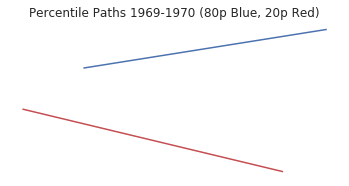

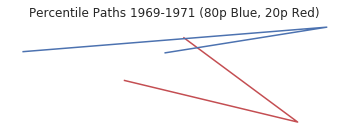

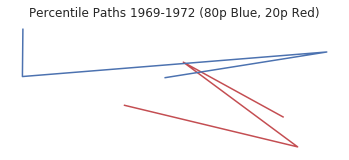

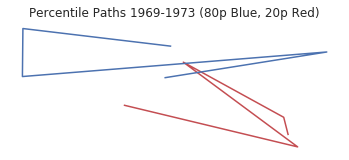

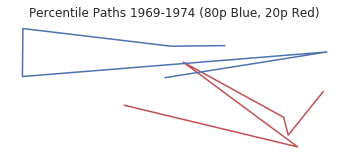

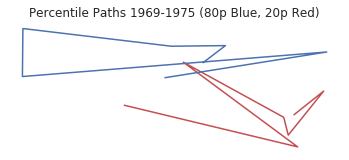

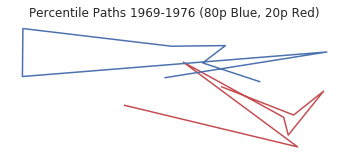

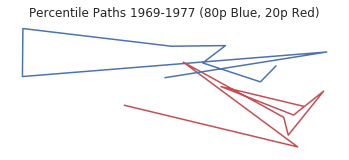

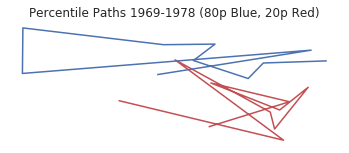

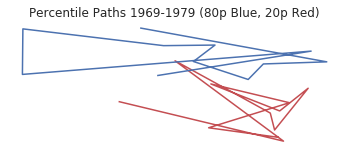

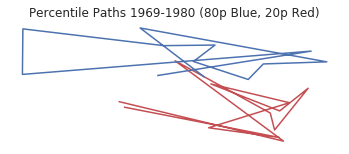

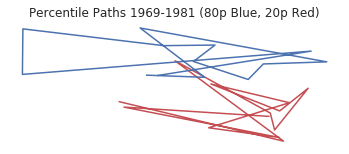

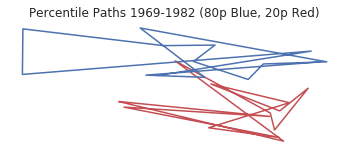

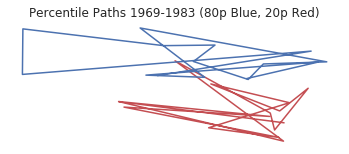

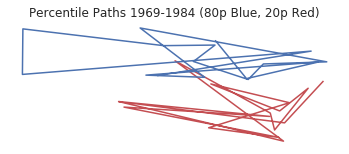

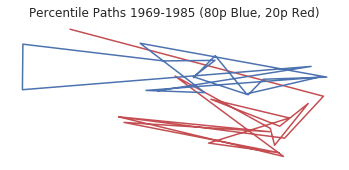

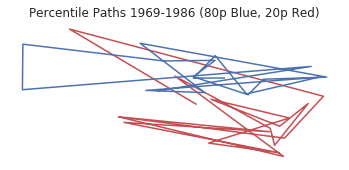

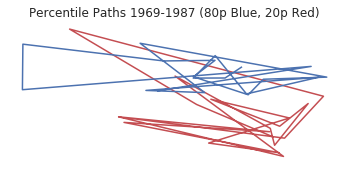

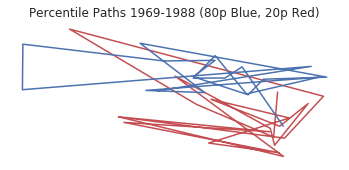

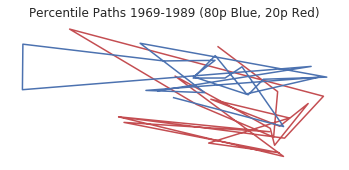

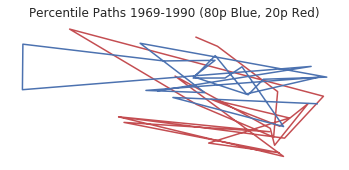

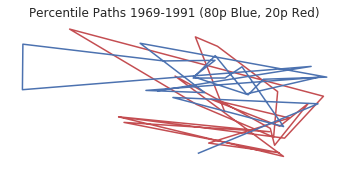

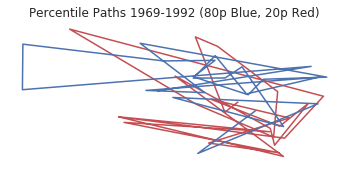

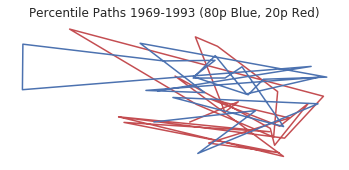

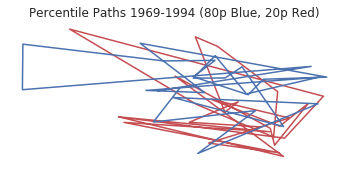

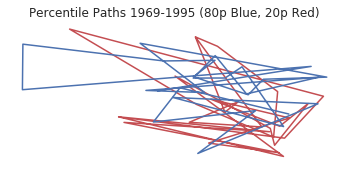

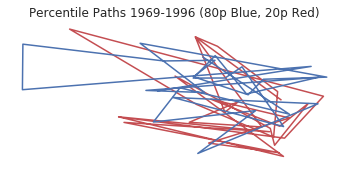

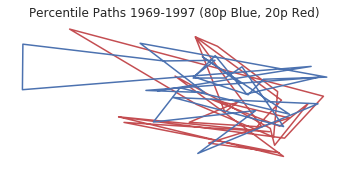

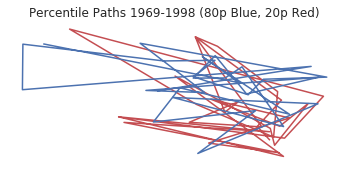

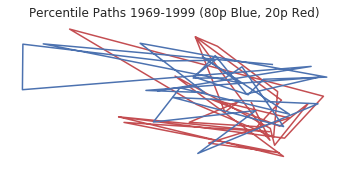

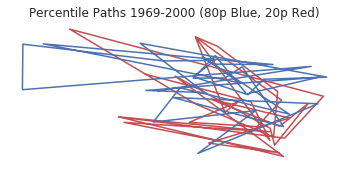

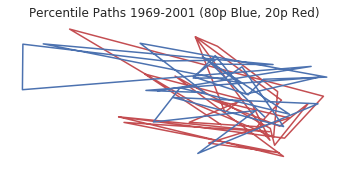

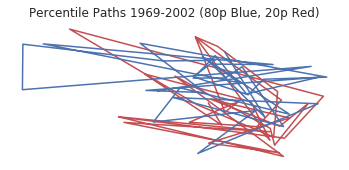

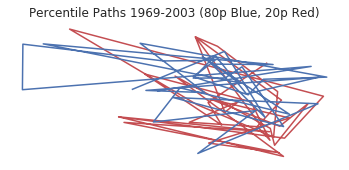

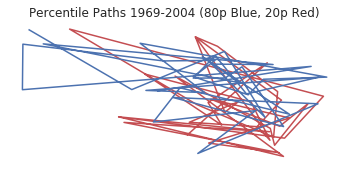

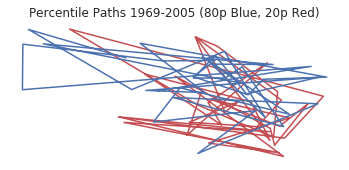

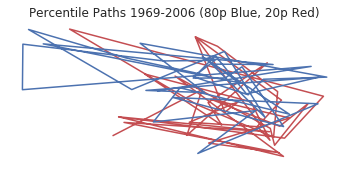

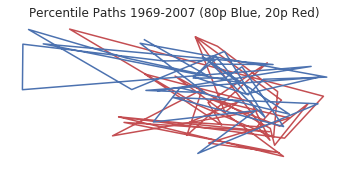

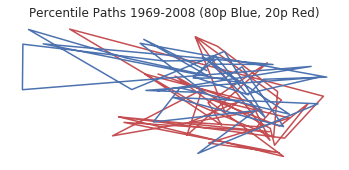

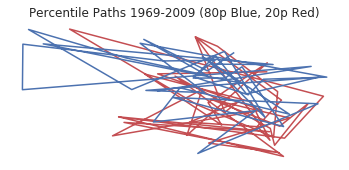

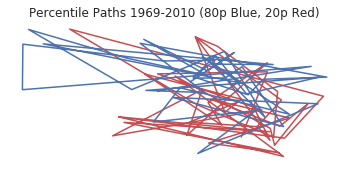

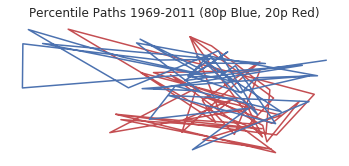

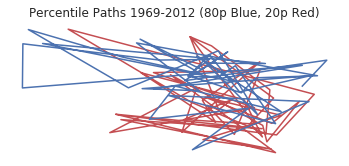

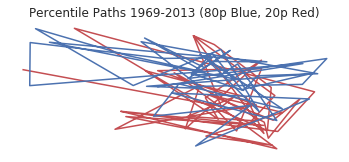

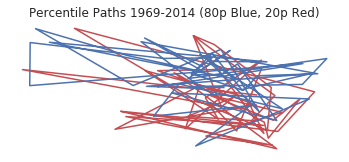

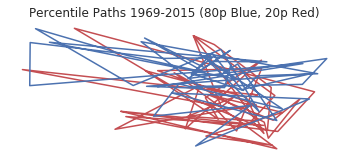

In [160]:
for i in range(2,48):
    #print(0,i)
    fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
    ls20 = geopandas.GeoSeries(LineString(df.loc[idxs[:,0],:].centroid.tolist()[0:i]))
    ls20.plot(ax=ax, color='r', label='20p')
    ls80 = geopandas.GeoSeries(LineString(df.loc[idxs[:,1],:].centroid.tolist()[0:i]))
    ls80.plot(ax=ax, color='b', label='20p')
    
    #ls80.plot(ax=ax, color='b')
    #gdf.plot(ax=ax,edgecolor='gray', alpha=0.2)
    title = 'Percentile Paths 1969-{} (80p Blue, 20p Red)'.format(1969+i-1)
    plt.title(title)
    ax.set_axis_off()

    

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.
<!-- #endregion -->